# How to use ProtNAff

This notebook will help you to understand how to use ProtNAff.

### Creation of the NA-protein database

The first step is to create your `structures.json`. To do this you need a list of pdb id, for the instance we give you a small list.

In [1]:
%%bash

cat pdbcode_test.list

1AQ3
1A34
1A1T
1A4T
1B23
1ASY
1AUD
1A9N


The creation of the database is done by:
`bash $PROTNAFF/create_database.sh [pdbcodes.list] ["dna"/"rna"]`

The steps performed by create_database.sh are the following:

* download all protein-NA structures from the PDB

* extract relevant information units on each structure (resolution, NA type, etc) and store it into one single easiliy-searchable json file.

* clean up each structure (add missing atoms, list incomplete nucleotides, list HETATM, etc)

* characterize the interface (sugar/phosphate/base - protein distances, water contacts, etc)

* use the 3DNA program [1] for NA structure description that gives exhaustive data in easily parsable Json format

* rearrange the data per nucleotide (eg. “nucl 5 to 15 make a stem-loop” → “nucl 5 is at position 1 in an 11-nucl stem-loop”)

[1] X-J Lu & WK Olson. 3DNA: a software package for the analysis, rebuilding and visualization of three‐dimensional nucleic acid structures. Nucleic Acids Research (2003) 31(17), 5108-21

With the list we provided you can run the `create_database.sh` script.

In [2]:
%%bash
mkdir -p $PROTNAFF/example/full_test
cd $PROTNAFF/example/full_test
bash $PROTNAFF/create_database.sh $PROTNAFF/example/pdbcode_test.list rna

/home/amoniot/Software/ProtNAff/
---------------------------- Download PDBs
downloading 1AQ3
downloading 1A34
downloading 1A1T
downloading 1A4T
downloading 1B23
downloading 1ASY
downloading 1AUD
downloading 1A9N
-------------------------- check pdb
-------------------------- detect NA - protein interface 
---------------------------------  parse initial pdb
--------------------------------- Fill-up missing atoms 
cleanPDB/1A1TB-1-iniparse-excise.pdb
cleanPDB/1A1TB-2-iniparse-excise.pdb
cleanPDB/1A1TB-3-iniparse-excise.pdb
cleanPDB/1A1TB-4-iniparse-excise.pdb
cleanPDB/1A1TB-5-iniparse-excise.pdb
cleanPDB/1A1TB-6-iniparse-excise.pdb
cleanPDB/1A1TB-7-iniparse-excise.pdb
cleanPDB/1A1TB-8-iniparse-excise.pdb
cleanPDB/1A1TB-9-iniparse-excise.pdb
cleanPDB/1A1TB-10-iniparse-excise.pdb
cleanPDB/1A1TB-11-iniparse-excise.pdb
cleanPDB/1A1TB-12-iniparse-excise.pdb
cleanPDB/1A1TB-13-iniparse-excise.pdb
cleanPDB/1A1TB-14-iniparse-excise.pdb
cleanPDB/1A1TB-15-iniparse-excise.pdb
cleanPDB/1A1TB-16-inip

--2021-06-10 15:14:41--  http://files.rcsb.org/download/1AQ3.pdb.gz
Résolution de files.rcsb.org (files.rcsb.org)… 128.6.158.49
Connexion à files.rcsb.org (files.rcsb.org)|128.6.158.49|:80… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 82457 (81K) [application/octet-stream]
Enregistre : «1AQ3.pdb.gz»

     0K .......... .......... .......... .......... .......... 62%  221K 0s
    50K .......... .......... ..........                      100% 1,77M=0,2s

2021-06-10 15:14:41 (331 KB/s) - «1AQ3.pdb.gz» enregistré [82457/82457]

--2021-06-10 15:14:41--  http://files.rcsb.org/download/1A34.pdb.gz
Résolution de files.rcsb.org (files.rcsb.org)… 128.6.158.49
Connexion à files.rcsb.org (files.rcsb.org)|128.6.158.49|:80… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 74420 (73K) [application/octet-stream]
Enregistre : «1A34.pdb.gz»

     0K .......... .......... .......... .......... .......... 68%  122K 0s
    50K .......... .......... 

This command is creating a lot of files and folder where you run it, pay attention to where you want to have your results. To give you more details, the folders are:
* brutPDBs: the pdb files downloaded from the PDB (link);
* chainmodels: files about the chains in the pdb;
* cleanPDB: the pdb after several modifications;
* interface: the file about the interface between the protein and the NA;
* 3dna: the results of x3DNA.

But what you need to look at is the `structures.json`, and you can only use this one if you want. The next cell is looking at this file in details.

In [11]:
import json

structures = json.load(open("./full_test/structures.json"))

print("Structures :", list(structures.keys()))

print("For each structures you have information in those keys: {}".format(list(structures['1A9N'].keys())))

/home/amoniot/Software/ProtNAff/example
Structures : ['1A1T', '1A34', '1A4T', '1A9N', '1AQ3', '1AQ4', '1ASY', '1AUD', '1B23', '1B7F']
For each structures you have information in those keys: ['NAprot_hb', 'NAprot_hb_sum', 'Nmodels', 'bptype', 'breaks', 'canonized', 'hetnames', 'interface_hetatoms', 'interface_protein', 'intraNA_hb', 'mapping', 'method', 'missing_atoms', 'nachains', 'protchains', 'resolution', 'sequence', 'ss', 'stacking']


If you want more informations on the content of `structures.json` please look at the paper (link).

### Requests to select (parts of) structures from the database

We created filters in python, but as the `.json` format is standard you can use the langage you want. Here we will use the filter to select part of RNA in contact with the protein and single-stranded.

The results will be print in a particular format, there is 3 information:
* The pdb id
* The RNA chain
* The list of ss nucleotides in contact, but be carreful, the numbers are the new numbers given by `create_database.sh`. If you want the numbers from the original pdb, you need to use the mapping in the `structures.json`

In [9]:
%%bash

cd $PROTNAFF/example/full_test
python $PROTNAFF/create_benchmark/filters/ss_contact_filter.py structures.json

/home/amoniot/Software/ProtNAff/example
1A1T B []
1A34 B []
1A34 C []
1A4T A []
1A9N Q [6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18]
1A9N R [6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18]
1AQ3 R [7, 8, 9, 10]
1AQ3 S [6, 7, 8, 9]
1AQ4 R [7, 8, 9, 10]
1AQ4 S [1, 7, 8, 9, 10]
1ASY R [26, 32, 33, 34, 35, 36, 37, 38, 72, 73, 74, 75]
1ASY S [26, 32, 33, 34, 35, 36, 37, 38, 72, 73, 74, 75]
1AUD B []
1B23 R [52, 71, 72, 73, 74]
1B7F P [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
1B7F Q [3, 4, 5, 6, 7, 8, 11, 12]


### Creation of the fragment library

The next step is the creation of the fragment library. You need to use the `create_frag_library.sh` script in the folder where you runned the `create_database.sh` script.

Usage: `$PROTNAFF/create_frag_library.sh ["dna"/"rna"]`

The protein-bound NA structures are cut into fragments (here trinucleotides), that are pooled by sequence and clustered by pairwise RMSD.

To increase the number of fragments per sequence motif, the full structures are mutated T/U > C and G > A (ex. AGU becomes AAC), and the representative fragments after clustering are mutated back into the 8 possible "de-mutated" sequence (AAC => AAC, GAC, GGC, GGU, AGC, AGU, AAU, GAU).

To accelerate clustering, the fragments are first converted into ATTRACT's coarse-grained representation. The resulting clustering scheme is then applied to the all-atom fragments.

In [8]:
%%bash

cd $PROTNAFF/example/full_test
bash $PROTNAFF/create_frag_library.sh rna

/home/amoniot/Software/ProtNAff/example
create_template
-------------------------------- fragments clustering


cat: motifs.list: Aucun fichier ou dossier de ce type
cat: motifs.list: Aucun fichier ou dossier de ce type
cat: motifs.list: Aucun fichier ou dossier de ce type
cat: motifs.list: Aucun fichier ou dossier de ce type
CCC
CCC-aa-fit-clust0.2
Traceback (most recent call last):
  File "/home/amoniot/Software/ProtNAff//create_frag_library//assign_clusters.py", line 57, in <module>
    dr = get_clust(motif + "-" + args.clustfiles[0])
  File "/home/amoniot/Software/ProtNAff//create_frag_library//assign_clusters.py", line 27, in get_clust
    ll = [l.split()[3:] for l in open(filename)]
FileNotFoundError: [Errno 2] No such file or directory: 'CCC-aa-fit-clust0.2'


CalledProcessError: Command 'b'echo $PWD\n\nbash $PROTNAFF/create_frag_library.sh rna\n'' returned non-zero exit status 1.

For the moment the fragment libraries are only trinucleotides. But we are working on the creation of double-stranded libraries and if you need something specific you can ask us

### Test of the installation

To check if the installation is correct compare the graph that you will obtain with the one in `notebook_name`.

There is also a comparison of md5sum between the different `.json`

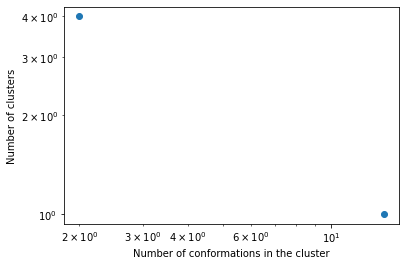

In [7]:
import matplotlib.pyplot as plt

with open("./full_test/trilib/AAA-dr0.2r-clust1.0") as ff:
    lines = ff.readlines()

res = {}
for line in lines:
    line = line.split(' ')
    len_line = len(line) - 4
    if len_line in res.keys():
        res[len_line] += 1
    else:
        res[len_line] = 1
        
fig, ax = plt.subplots()
ax.scatter(res.keys(), res.values())
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
ax.set_xscale("log")
ax.set_yscale("log")
ax.yaxis.set_tick_params(labelcolor="black")
ax.xaxis.set_tick_params(labelcolor="black")
plt.ylabel("Number of clusters", color="black")
plt.xlabel("Number of conformations in the cluster", color="black")
plt.show()